In [1]:
# Notebook imports and packages
import numpy as np
from sympy import symbols, diff, lambdify

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

%matplotlib inline

# Graphing 3D Gradient Descent


$f(x, y)=\frac{1}{3^{-x^2-y^2}+1}$ $\cdot\cdot\cdot$ $\frac{\partial f(x, y)}{\partial x}=\frac{2x\ln \left(3\right)\cdot \:3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$ $\cdot\cdot\cdot$ $\frac{\partial f(x, y)}{\partial y}=\frac{2y\ln \left(3\right)\cdot \:3^{-y^2-x^2}}{\left(3^{-x^2-y^2}+1\right)^2}$

In [2]:
# def f(x, y):
    # return 1/(3**(-(x**2)-(y**2)) + 1)

a, b = symbols('x, y')

f = lambda x, y: 1/(3**(-(x**2)-(y**2)) + 1)
dfx=lambdify([a,b], diff(f(a,b), a)) 
dfy=lambdify([a,b], diff(f(a,b), b)) 

npls = np.linspace(-2, 2, 1001)
x, y = np.meshgrid(npls, npls) 

In [3]:
multiplier = .13
max_iter = 100
params = np.array([1.8, 1.0])
values_array = params.copy()

params2 = np.array([-1.8, 1.0])
values_array2 = params2.copy()

for n in range(max_iter):
    gradient_x, gradient_y = dfx(*params), dfy(*params)
    gradients = np.array([gradient_x,gradient_y]) # These two first steps could be combined into one;
    params = params - multiplier * gradients
    values_array = np.vstack((values_array, params))

    params2 = params2 - multiplier * np.array([dfx(*params2), dfy(*params2)])
    values_array2 = np.vstack((values_array2, params2))

print("Values in gradient array", gradients)
print("Minimum occurs at (x,y):", tuple(params))
print("The cost is:\t\t", f(*params))

Values in gradient array [0.02439443 0.01355246]
Minimum occurs at (x,y): (0.04123835489616, 0.022910197164533366)
The cost is:		 0.5006112343532751


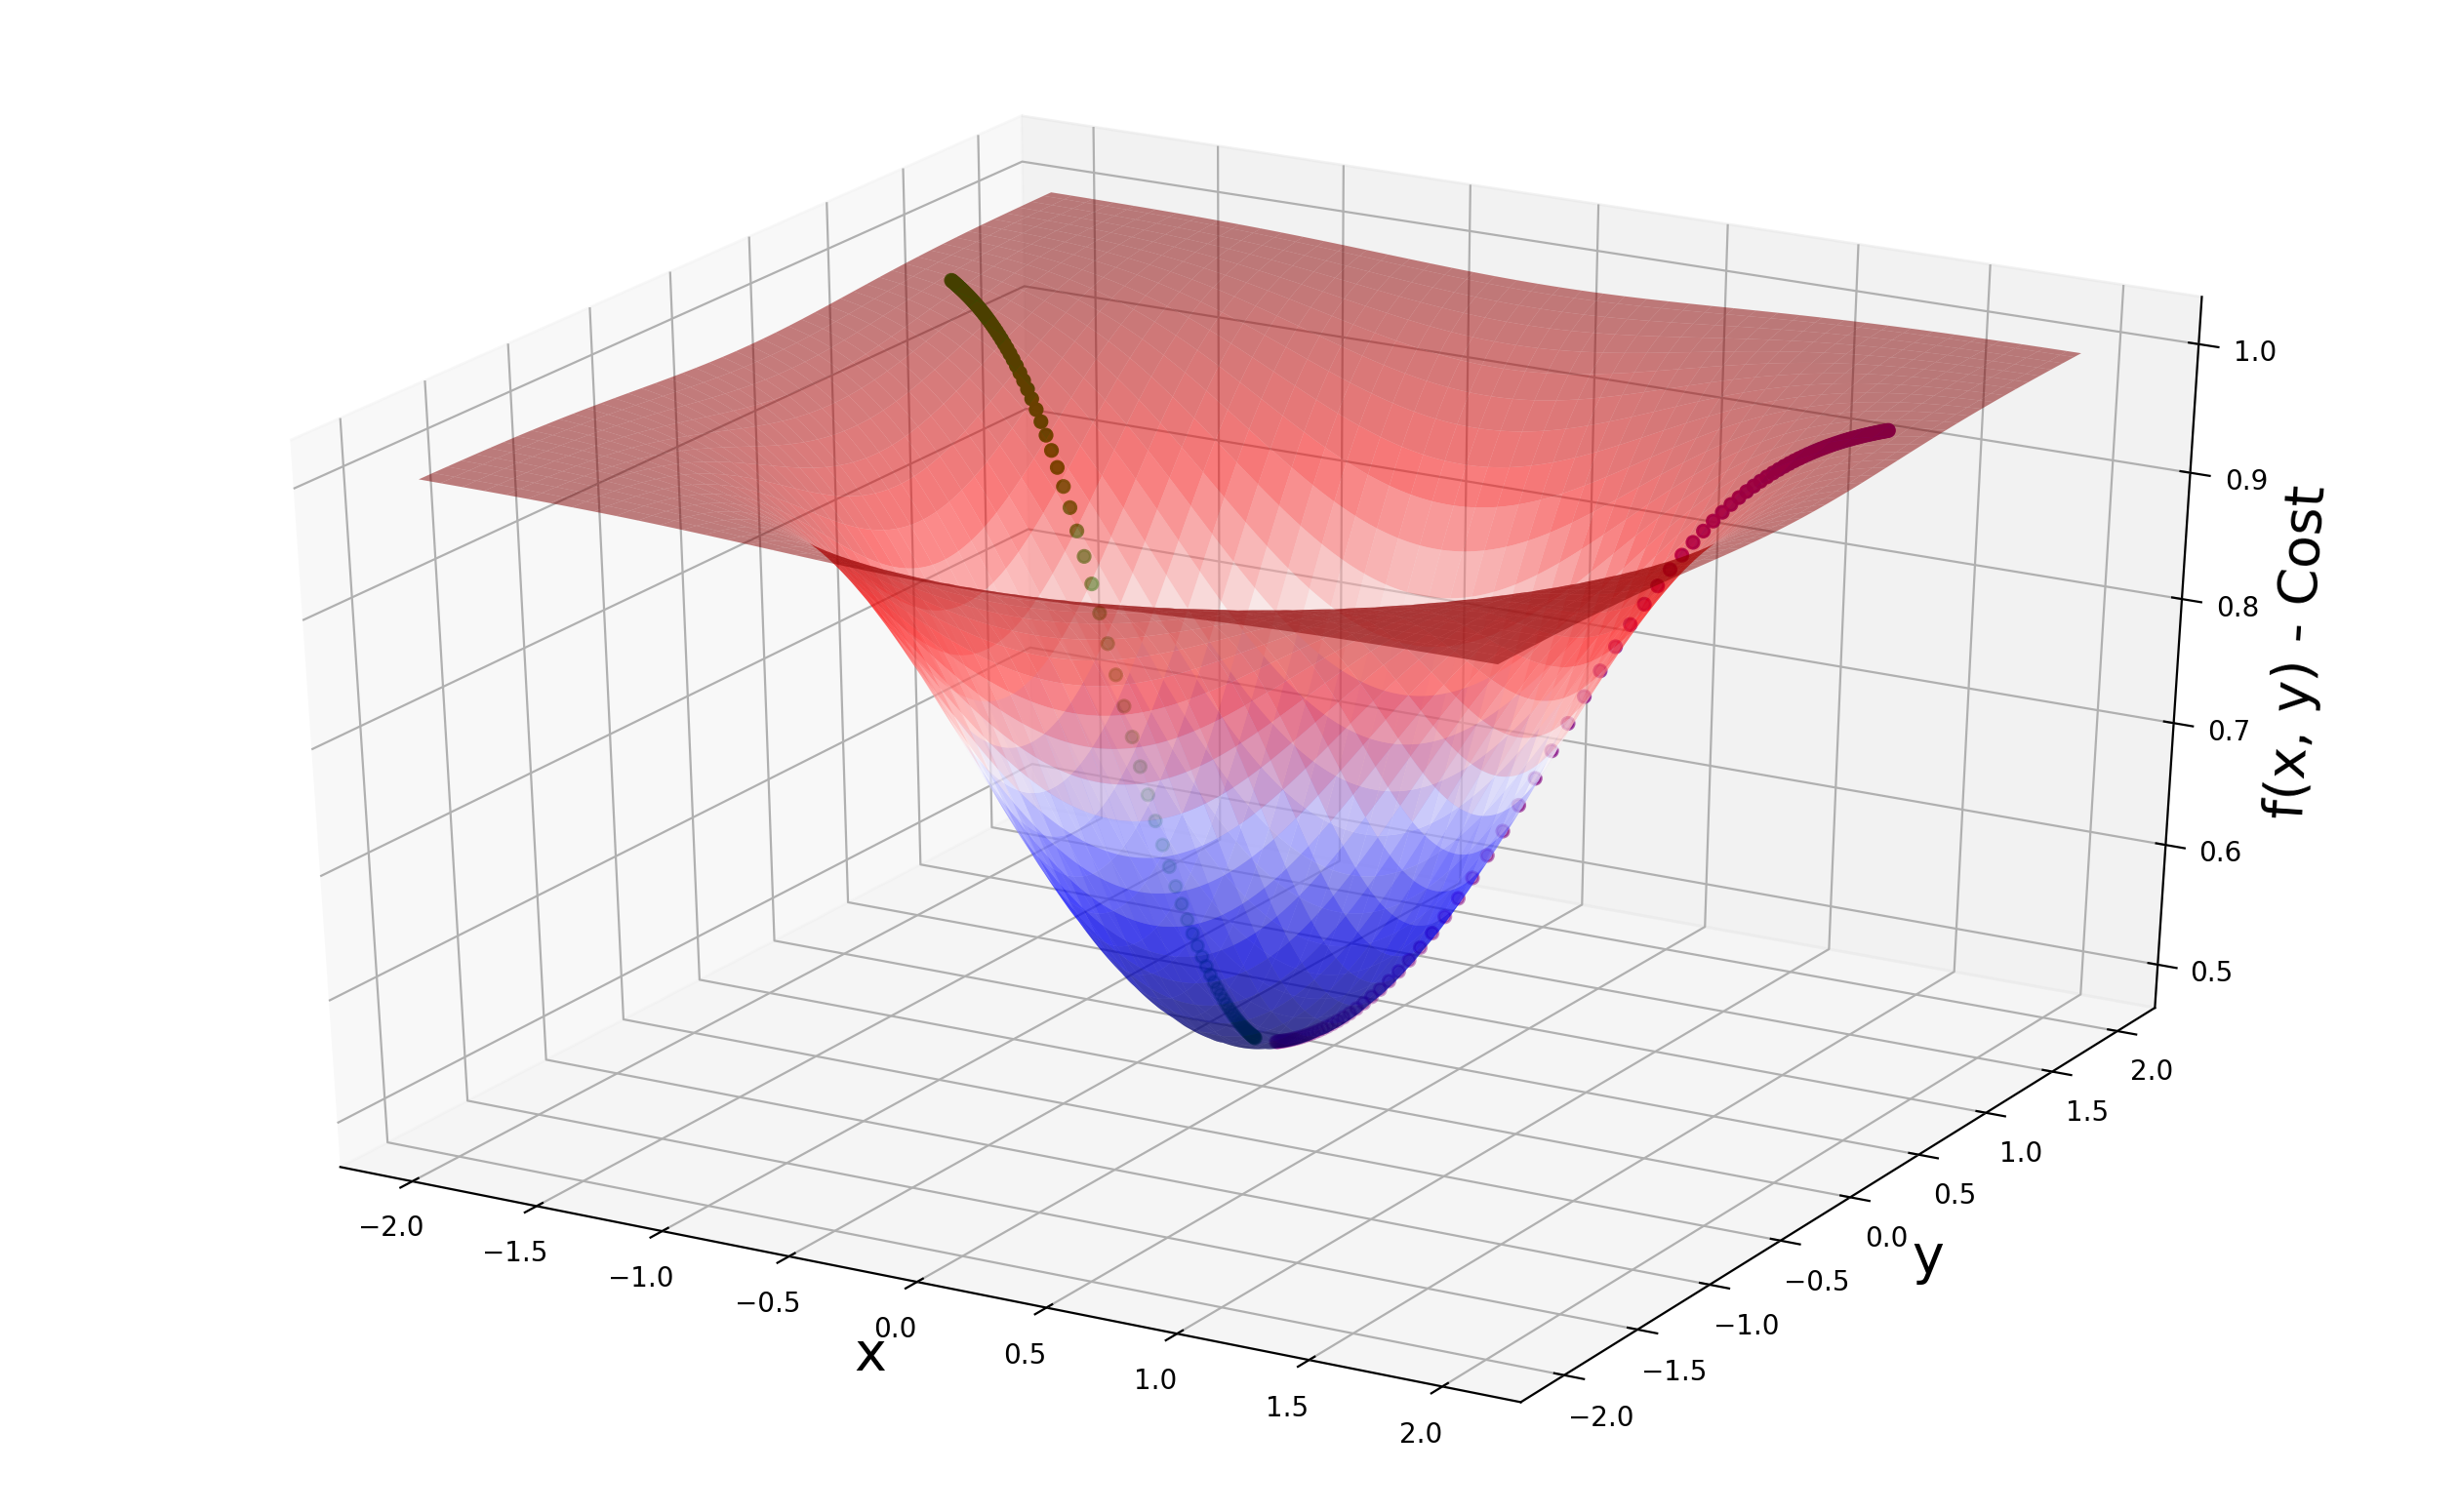

In [4]:
fig = plt.figure(figsize=[16, 10] , dpi=200)
ax = fig.gca(projection='3d')


ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x, y, f(x, y), cmap=cm.seismic, alpha=.5) # cmap defines the colors of the figure.
ax.scatter(
    values_array[:, 0],
    values_array[:, 1],
    f(values_array[:, 0], values_array[:, 1]),
    s=20,
    color='purple'
)
ax.scatter(
    values_array2[:, 0],
    values_array2[:, 1],
    f(values_array2[:, 0], values_array2[:, 1]),
    s=20,
    color='green'
)

plt.show()